### Scale-free networks and attacks on networks
           
1. Generate a free scale network with 10000 nodes and add 10 nodes in each step (use the barabasi_albert_graph (n, m) routine ).
2. Calculate the values of L, C and the grade distribution of the nodes. 
3. Generate a random network that has the same number of nodes and branches as the network that you have created, calculate your values.

        a) L 
        b) C 
        c) The degree distribution of the nodes
        d) Compare the values obtained


In [1]:
import networkx as nx
from networkx import DiGraph
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import random
import numpy as np
import sys

In [2]:
#Scale free network

def scale_free_L_C_degree(n,m):
    scale_free = nx.barabasi_albert_graph(n, m)

    L = nx.average_shortest_path_length(scale_free)
    C = nx.average_clustering(scale_free)

    max_degree = 0
    node = ""

    for n, d in scale_free.degree:
        if d > max_degree:
            max_degree = d
            node = n

    print("Scale free graph results:")
    print("")
    print("The average shortest path (L) is",L)
    
    print("The clustering coefficient (C) is",C)
    #print("")
    #print("The node ",node, "has the highest degree in the scale free graph with a value of ",max_degree)
    print("")
    
    #Bar graph for the scale free graph
    SF=nx.degree_histogram(scale_free)
    plt.bar(range(len(SF)),SF, width=5, color='b')
    plt.title("Degree distribution of the nodes for Scale free graph")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

###############################################################################################################################

#random network

def Random_L_C_degree(n,m):
    
    random = nx.gnm_random_graph(n, m)

    #characteristic path
    #if the graph is connected, calculate the shortest path
    try:
        Lr = nx.average_shortest_path_length(random)
        print("Random graph results:")
        print("The average shortest path (L) is",Lr)

    #if graph is disconnected
    except:
        Lr = []
        path = nx.connected_component_subgraphs(random)
        subgraph = []
        for component in path:
            L_sub = nx.average_shortest_path_length(component)
            subgraph.append(L_sub)
        Lr.append(max(subgraph))
        print("Random graph results:")
        print("")
        print("The graph is disconnected however, the average shortest path (L) for the largest subgraph is",Lr)

    Cr = nx.average_clustering(random)

    r_max_degree = 0
    node = ""

    for n, d in random.degree:
        if d > r_max_degree:
            r_max_degree = d
            node = n

    
    print("The clustering coefficient (C) is",Cr)
    #print("")
    #print("The node ",node, "has the highest degree in the random network with a value of ",r_max_degree)
    print("")
    
    #Bar graph for the scale free graph
    R=nx.degree_histogram(random)
    plt.bar(range(len(R)),R, width=5, color='b')
    plt.title("Degree distribution of the nodes for the Random graph")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()



Scale free graph results:

The average shortest path (L) is 3.070429902990299
The clustering coefficient (C) is 0.01071562795891801



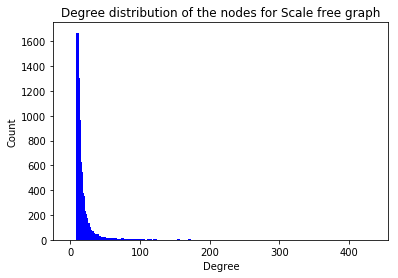

Random graph results:

The graph is disconnected however, the average shortest path (L) for the largest subgraph is [1.0]
The clustering coefficient (C) is 0.0



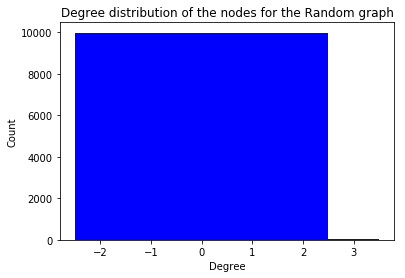

In [3]:
n = 10000
m = 10
scale_free_L_C_degree(n,m)
Random_L_C_degree(n,m)

### Comparing the results from the Scale-free and Random networks

##### Clustering Ceofficient:

       1) Scale free network (C) = 0.01
       2) Random network (C) = 0.0

The clustering ceofficient is slightly higher for the scale free graph compared to the Random network. In relation to the scale free network, the clustering coefficient also scales with network size following approximately a power law:

                C ~ N^-0.75
##### Average path length:

       1) Scale free network (L) = 3.07
       2) Random network (L) = 1.0

The average path length is larger for the Scale free netwrok compared to the Random netwrok. This is due to the random network being disconnected
##### Degree Distribution:

For the random netwrok, the distribution is very narrow, with the largest degree being 3. Comparing this to the scal free netwrok, the distribution is larger wider with the max degree being over 400. 



# Attack the Network

1. Implement a routine program random_attack (G, m) in Python that perform a random attack on m nodes of graph G.


In [4]:
def Random_attack(G,m):  
    
    #Get a list of all the nodes
    ListOfNodes = G.nodes()
    NumberofNodesBefore = G.number_of_nodes()
    
    #the number of nodes you want to remove
    sample = m
    
    #Select a sample of random numbers from your list of nodes
    RandomSample = random.sample(ListOfNodes, sample)
    
    #Remove the nodes
    G.remove_nodes_from(RandomSample)
    NumberofNodesafter = G.number_of_nodes()
    
    # Calculate the largest clustering coefficient 
    path = nx.connected_component_subgraphs(G)
    subgraph = []
    L = []
    for component in path:
        L_sub = nx.average_shortest_path_length(component)
        subgraph.append(L_sub)
    L.append(max(subgraph))
    random_size_component = max(subgraph)

    return random_size_component


2. Use the previous routine to calculate the size of the largest component connected in 

        a) random, 
        b) small world and 
        c) scale-free graphs 

Parameters: 1000 nodes and 4000 branches after attacks of 10%, 30%, 50%, 70% and 90% of the nodes of the graph

In [13]:
n = 1000
m = 4000
m_less = 10 #Barabási–Albert network must have m >= 1 and m < n
k = 2

percentage_list = [10, 30, 50, 70, 90]

#Create a matrix to store the functions output
rows = len(percentage_list)
size = (3, rows)
Random_results=np.zeros(size)

#For each percentage, generate a new network and attack
i = 0
for percentage in percentage_list:
    
    sys.stdout.write('.')
    sys.stdout.flush()
    
    #number of nodes to be removed
    M = round((n/100)*percentage)
    
    #attak the network
    random_G = nx.gnm_random_graph(n, m)
    scale_free_G = nx.barabasi_albert_graph(n, m_less)
    small_world_G = nx.newman_watts_strogatz_graph(n, k, 1)
    
    #store the resukts in a matrix
    Random_results[0,i]= Random_attack(random_G, M)
    Random_results[1,i]= Random_attack(scale_free_G, M)
    Random_results[2,i]= Random_attack(small_world_G, M)
    i = i+1
    
    
print("")
print(Random_results)

.....
[[ 3.66414651  3.97780911  4.5626059   6.12835363  2.38095238]
 [ 2.56869114  2.63972614  2.82282966  2.9109476   4.17316017]
 [ 5.84651593  7.35234832 10.63989805  6.07881773  1.33333333]]


# Now attack based on nodes with the highest degree

1. Implement a gram_schema program routine (G, m) in Python that performs an attack based on degrees to m nodes of graph G.


In [6]:
def Gram_schema(G,M):  
    
    #Get a list of sorted nodes based on degree
    ListOfNodes = sorted(G.degree, key=lambda x: x[1], reverse=True)            
    
    nodes = []
    count = 0
    for node, degree in ListOfNodes:
        if count > M-1:
            break
        else:
            nodes.append(node) # = degree
            count = count+1
    
    #Remove the nodes with the highest degree
    G.remove_nodes_from(nodes)
    
    #calculate the largest clustering coefficient
    path = nx.connected_component_subgraphs(G)
    subgraph = []
    L = []
    
    for component in path:
        
        L_sub = nx.average_shortest_path_length(component)
        subgraph.append(L_sub)
        
    L.append(max(subgraph))
    size_component = max(subgraph)
    
    return size_component


2. Use the previous routine to calculate the size of the largest component connected in 

        a) random, 
        b) small world and 
        c) scale-free graphs 

Parameters: 1000 nodes and 4000 branches after attacks of 10%, 30%, 50%, 70% and 90% of the nodes of the graph
 

In [12]:
n = 1000
m = 4000
m_less = 10 #Barabási–Albert network must have m >= 1 and m < n
k = 2



percentage_list = [10, 30, 50, 70, 90]
rows = len(percentage_list)
size = (3, rows)
Gram_results=np.zeros(size)

i = 0
for percentage in percentage_list:
    
    sys.stdout.write('.')
    sys.stdout.flush()
    

    M = round((n/100)*percentage)
    random_G = nx.gnm_random_graph(n, m)
    scale_free_G = nx.barabasi_albert_graph(n, m_less)
    small_world_G = nx.newman_watts_strogatz_graph(n, k, 1)
   
    Gram_results[0,i]= Gram_schema(random_G, M)
    Gram_results[1,i]= Gram_schema(scale_free_G, M)
    Gram_results[2,i]= Gram_schema(small_world_G, M)
    i = i+1
print("")
print(Gram_results)

.....
[[ 3.94778428  5.2582626   8.70041229  4.0952381   1.        ]
 [ 3.12361142  4.19791679  6.9430537   5.34782609  0.        ]
 [ 6.64534013 11.35749828 13.30335377  2.          1.33333333]]


# Compare the results of the two functions

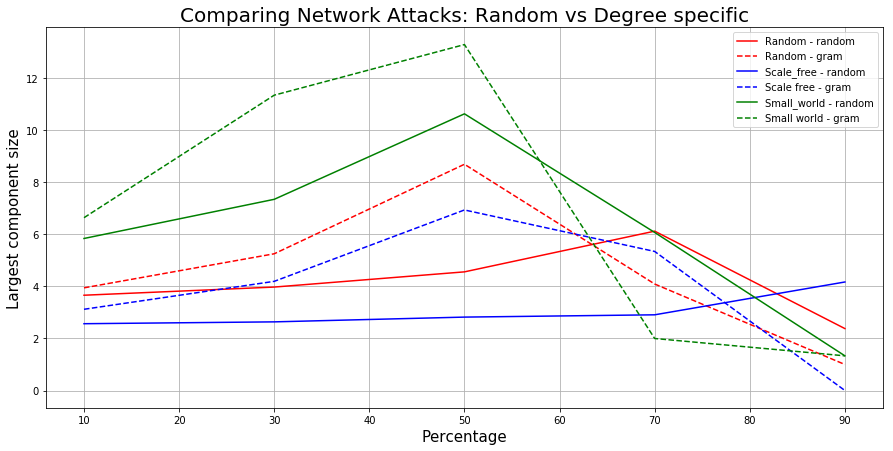


Random_attack:
[[ 3.66414651  3.97780911  4.5626059   6.12835363  2.38095238]
 [ 2.56869114  2.63972614  2.82282966  2.9109476   4.17316017]
 [ 5.84651593  7.35234832 10.63989805  6.07881773  1.33333333]]

Gram_attack:
[[ 3.94778428  5.2582626   8.70041229  4.0952381   1.        ]
 [ 3.12361142  4.19791679  6.9430537   5.34782609  0.        ]
 [ 6.64534013 11.35749828 13.30335377  2.          1.33333333]]


In [14]:
plt.figure(figsize=[15,7])

percentage_list = [10, 30, 50, 70, 90]
#plt.legend(handles=legend_handles, loc = 1)
plt.plot(percentage_list,Random_results[:][0],  'red', label="Random - random")
plt.plot(percentage_list,Gram_results[:][0], color = 'red', ls='--', label="Random - gram")
plt.plot(percentage_list,Random_results[:][1], 'blue', label="Scale_free - random")
plt.plot(percentage_list,Gram_results[:][1], color = 'blue', ls='--', label="Scale free - gram")
plt.plot(percentage_list,Random_results[:][2], 'green', label="Small_world - random")
plt.plot(percentage_list,Gram_results[:][2], color = 'green', ls='--', label="Small world - gram")

plt.xlabel('Percentage', size=15)
plt.ylabel('Largest component size', size=15);
plt.title('Comparing Network Attacks: Random vs Degree specific', size=20)
plt.legend()

plt.grid(True)
plt.show()
print("")
print("Random_attack:")
print(Random_results)
print("")
print("Gram_attack:")
print(Gram_results)

As the random_attack is removing nodes at random and the Gram_attack is an intelligent attack, we would expect for the Gram_attack to perform better on the graphs however, this is topology dependent. The computational cost of each attack is also different. As the random attack is fairly simplistic, the cost is O(n) compared to the more complex intelligent attack. For the intelligent attack, we must also calculate the degree of every node. This increases the cost to O(n^2).

The results are summarized below:


##### 1) Random Network:  

    a) Random_attack - The network performed well against this attack. From the graph above, the clustering coefficient changes at a consistant rate. This is demonstrated by the solid red line in the graph above
    
    b) Gran_attack - Again, the change in clustering ceofficient reduces at a consistant rate. 
    
##### 2) Scale Free Network:

    a) Random_attack - The network performed well against this attack.  
    
    b) Gran_attack - Less resistant to the intelligent attack. From the graph above, you can see the the dotted blue line has a lower clustering coefficient for all the percentages compared to the random attack. 


##### 3) Small World Network:

    a) Random_attack - The network performed well against this attack.  
    
    b) Gran_attack - Again, the small world performed well against this attack 

##### Best attack method against each graph:
Random Network:<br>
Gram_attack - As shown above, this performed better than the random_attack <br>
Scale Free Network:<br>
Gram_attack - As shown above, this network is less resistant to this type of attack<br>
Small World Network:<br>
Random Attack - Both attacks performed similar but the Random_attack costs less than the intelligent attack